# DS | Unit Project 2
***
## PROMPT

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our first modeling exercise in Project 3.

Before completing an analysis, it is critical to understand your data. You will need to identify all the biases and variables in your model in order to accurately assess the strengths and limitations of your analysis and predictions.

Following these steps will help you better understand your dataset.

Goal: An IPython notebook writeup that provides a dataset overview with visualizations and statistical analysis.

## DELIVERABLES


#### IPython Notebook Exploratory Analysis

###### Requirements:

* Read in your dataset, determine how many samples are present, and ID any missing data
 >There are 400 rows of data
 >There are 2 counts of missing data in columns GRE and GPA, and 1 count of missing data in Prestige
 >The missing data are as follows: 
 
|Row Number| __Admit__| __GRE__ | __GPA__ | __Prestige__ |
|----------|----------|---------|---------|--------------|
| 187      |0         | NULL    |NULL     |2.0           |
| 212      |0         | NULL    |2.87     |2.0           |
| 236      |1         | 660.0   |NULL     |NULL          |

 
* Create a table of descriptive statistics for each of the variables (n, mean, median, standard deviation)
 > See below
* Describe the distributions of your data
 > See below
* Plot box plots for each variable
 > See below
* Create a correlation matrix
 > See below
* Determine any issues or limitations, based on your exploratory analysis
 >GRE and GPA are not normally distributed, and there are missing values which may affect the robustness of any conclusions drawn from correlations or logistic regression analyses.  

### Bonus:

* Replace missing values using the median replacement method
* Log transform data to meet normality requirements
* Advanced Option: Replace missing values using multiple imputation methods

In [41]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import Imputer

%matplotlib inline

In [2]:
admissions = pd.read_csv("/Users/Administrator/lessons/DS-SG-04/projects/unit-projects/project-1/assets/admissions.csv")

In [8]:
admissions[:]

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [9]:
admissions.isnull()

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [54]:
null_data = admissions[admissions.isnull().any(axis=1)]
print null_data

     admit    gre   gpa  prestige
187      0    NaN   NaN       2.0
212      0    NaN  2.87       2.0
236      1  660.0   NaN       NaN


Create a table of descriptive statistics for each of the variables (n, mean, median, standard deviation)

In [3]:
admissions.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [92]:
print admissions.gre.kurtosis()
print admissions.gre.skew()
print admissions.gpa.kurtosis()
print admissions.gpa.skew()

-0.330065338167
-0.150126665946
-0.574622543215
-0.211765490335


Describe the distributions of your data

Admit is a binary variable, with 0 = not admit and 1 = admit
GRE has a mean of 588, with a range of 220-800, and a SD of 115.6. It is also negatively skewed. 
GPA has a mean of 3.39, with a range of 2.26 to 4.0, and a SD of 0.38. It is negatively skewed. 
Prestige is a categorical variable, with values of 1 = highest, 2, 3 and 4 = lowest ranked. The mean prestige is 2.48 with a SD of 0.95. 

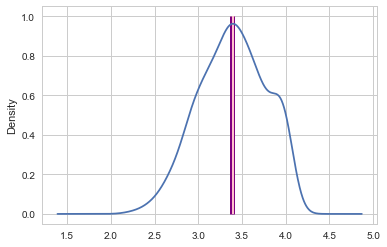

In [90]:
# density plot for continuous variable GPA
admissions["gpa"].plot(kind="density")
plt.vlines (admissions["gpa"].mean(),
           ymin=0,
           ymax=1.0,
           linewidth=5.0,
           color="purple")
plt.vlines (admissions["gpa"].median(),
           ymin=0,
           ymax=1.0,
           linewidth=2.0,
           color="pink")

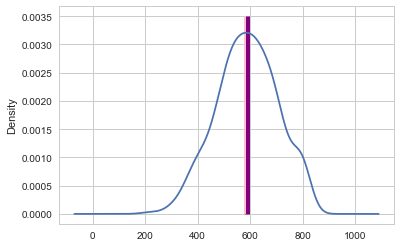

In [89]:
# density plots for continuous variable GRE
admissions["gre"].plot(kind="density")
plt.vlines (admissions["gre"].mean(),
           ymin=0,
           ymax=0.0035,
           linewidth=5.0,
           color="purple")
plt.vlines (admissions["gre"].median(),
           ymin=0,
           ymax=0.0035,
           linewidth=2.0,
           color="pink")

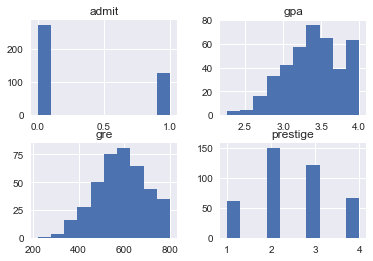

In [14]:
# plot all of the columns
admissions.hist()
plt.show()

Plot box plots for each variable

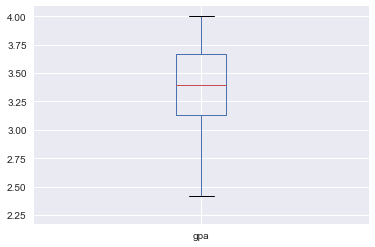

In [16]:
# box plot for GPA
admissions[["gpa"]].plot(kind="box")

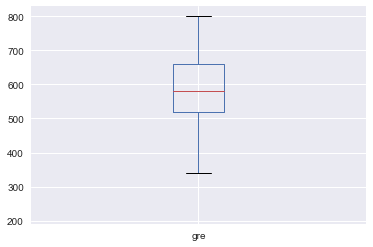

In [17]:
#box plot for GRE
admissions[["gre"]].plot(kind="box")

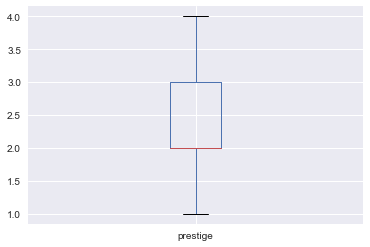

In [19]:
#box plot for prestige
admissions[["prestige"]].plot(kind="box")

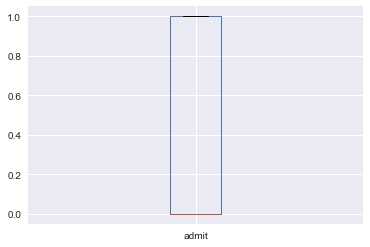

In [20]:
#box plot for admit
admissions[["admit"]].plot(kind="box")

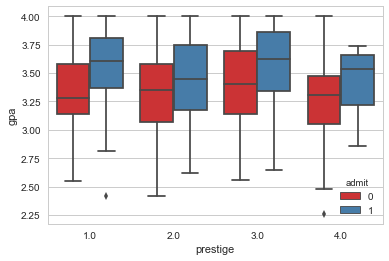

In [82]:
ax = sns.boxplot(x="prestige", y="gpa", hue="admit",
...                  data=admissions, palette="Set1")

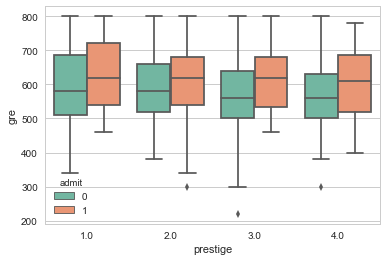

In [80]:
ax = sns.boxplot(x="prestige", y="gre", hue="admit",
...                  data=admissions, palette="Set2")

In [63]:
# dummify rank to handle categorical variables
dummy_ranks = pd.get_dummies(admissions['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


In [74]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = admissions[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


In [65]:
data = data.rename(columns={'prestige_2.0':'prestige2','prestige_3.0':'prestige3','prestige_4.0':'prestige4'})

Create a correlation matrix

In [66]:
# Looking at correlations between the variables
data.corr()

,admit,gre,gpa,prestige2,prestige3,prestige4
admit,1.000000,0.182919,0.175952,0.059627,-0.121800,-0.133356
gre,0.182919,1.000000,0.382408,0.057174,-0.075340,-0.069701
gpa,0.175952,0.382408,1.000000,-0.054744,0.072956,-0.085888
prestige2,0.059627,0.057174,-0.054744,1.000000,-0.510113,-0.347449
prestige3,-0.121800,-0.075340,0.072956,-0.510113,1.000000,-0.295397
prestige4,-0.133356,-0.069701,-0.085888,-0.347449,-0.295397,1.000000


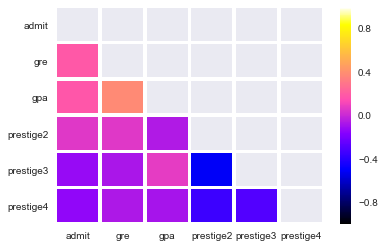

In [73]:
corr_data = data.corr(method = 'pearson')
# Playing around with heatmaps to visualize correlations
mask = np.zeros_like(corr_data)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_data, cmap='gnuplot2', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)

Replace missing values using the median replacement method

In [39]:
#Replacing the NULL values with Median of the columns using fillna
median_admissions = admissions.median()
print median_admissions
filled_admissions = admissions.fillna(admissions.median())
print filled_admissions

admit         0.000
gre         580.000
gpa           3.395
prestige      2.000
dtype: float64
     admit    gre   gpa  prestige
0        0  380.0  3.61       3.0
1        1  660.0  3.67       3.0
2        1  800.0  4.00       1.0
3        1  640.0  3.19       4.0
4        0  520.0  2.93       4.0
5        1  760.0  3.00       2.0
6        1  560.0  2.98       1.0
7        0  400.0  3.08       2.0
8        1  540.0  3.39       3.0
9        0  700.0  3.92       2.0
10       0  800.0  4.00       4.0
11       0  440.0  3.22       1.0
12       1  760.0  4.00       1.0
13       0  700.0  3.08       2.0
14       1  700.0  4.00       1.0
15       0  480.0  3.44       3.0
16       0  780.0  3.87       4.0
17       0  360.0  2.56       3.0
18       0  800.0  3.75       2.0
19       1  540.0  3.81       1.0
20       0  500.0  3.17       3.0
21       1  660.0  3.63       2.0
22       0  600.0  2.82       4.0
23       0  680.0  3.19       4.0
24       1  760.0  3.35       2.0
25       1  800.0  3.

In [40]:
null_data_1 = filled_admissions[filled_admissions.isnull().any(axis=1)]
print null_data_1

Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []


Log transform data to meet normality requirements

     log_admit   log_gre   log_gpa  log_prestige
1     0.000000  5.942799  1.528228      1.386294
2     0.693147  6.493754  1.541159      1.386294
3     0.693147  6.685861  1.609438      0.693147
4     0.693147  6.463029  1.432701      1.609438
5     0.000000  6.255750  1.368639      1.609438
6     0.693147  6.634633  1.386294      1.098612
7     0.693147  6.329721  1.381282      0.693147
8     0.000000  5.993961  1.406097      1.098612
9     0.693147  6.293419  1.479329      1.386294
10    0.000000  6.552508  1.593309      1.098612
11    0.000000  6.685861  1.609438      1.609438
12    0.000000  6.089045  1.439835      0.693147
13    0.693147  6.634633  1.609438      0.693147
14    0.000000  6.552508  1.406097      1.098612
15    0.693147  6.552508  1.609438      0.693147
16    0.000000  6.175867  1.490654      1.386294
17    0.000000  6.660575  1.583094      1.609438
18    0.000000  5.888878  1.269761      1.386294
19    0.000000  6.685861  1.558145      1.098612
20    0.693147  6.29

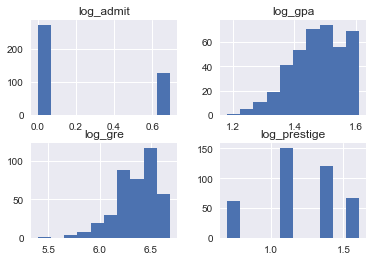

In [48]:
df = filled_admissions
# apply log(x+1) element-wise to a subset of columns
to_log = ['admit','gre', 'gpa','prestige']
df_log = df[to_log].applymap(lambda x: np.log(x+1))

# rename columns
df_log.columns = 'log_' + df_log.columns

# shift the index
df_log.index = df_log.index + 1

print df_log

df_log.hist()
plt.show()

Advanced Option: Replace missing values using multiple imputation methods

In [52]:
#Using the Imputer class to replace missing values with the mean of each column 
#Print the number of NaN values in the transformed matrix.
values = admissions.values
imputer = Imputer()
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum())

0


In [53]:
print transformed_values

[[   0.    380.      3.61    3.  ]
 [   1.    660.      3.67    3.  ]
 [   1.    800.      4.      1.  ]
 ..., 
 [   0.    460.      2.63    2.  ]
 [   0.    700.      3.65    2.  ]
 [   0.    600.      3.89    3.  ]]
